#### Pytorch之60min入门
- Pytorch入门
- Pytorch自动微分
- Pytorch神经网络
- Pytorch图像分类器
- Pytorch数据并行处理

In [1]:
# 开始学习

from __future__ import print_function
import torch

In [4]:
x = torch.empty(5, 3)
print(x)
print(type(x))
print(x.dtype)

tensor([[-4.0839e+24,  3.0913e-41,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-4.0839e+24,  3.0913e-41, -4.0839e+24]])
<class 'torch.Tensor'>
torch.float32


In [8]:
x = torch.rand(5, 3)
# 均匀分布
# torch.rand(*sizes, out=None) → Tensor
# 返回一个张量，包含了从区间[0, 1)的均匀分布中抽取的一组随机数。张量的形状由参数sizes定义。
# sizes (int...) - 整数序列，定义了输出张量的形状

print(x)
print(type(x))
print(x.dtype)

x = torch.rand([5, 3])
print(x)
print(type(x))
print(x.dtype)

# rand中size即可以是放到rand()中，也可以把size作为一个整体，为一个参数放到rand中。

tensor([[0.2885, 0.3063, 0.1791],
        [0.9699, 0.9497, 0.1003],
        [0.8119, 0.2578, 0.1941],
        [0.1042, 0.1585, 0.7904],
        [0.4160, 0.2125, 0.1010]])
<class 'torch.Tensor'>
torch.float32
tensor([[0.8147, 0.2261, 0.6889],
        [0.2031, 0.3969, 0.3911],
        [0.7102, 0.3482, 0.8071],
        [0.3605, 0.5333, 0.7009],
        [0.3742, 0.5598, 0.6429]])
<class 'torch.Tensor'>
torch.float32


In [11]:
x = torch.zeros((5, 3))

print(x)
print(type(x))
print(x.dtype)

# zeros跟rand输入一样
# zeros默认参数为float32类型

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
<class 'torch.Tensor'>
torch.float32


In [20]:
# 直接使用数据构造张量
x = torch.tensor([5.5, 3], dtype=torch.long)
print(x)
print(type(x))
print(x.dtype)
# 直接构造张量时，最好指定数据类型，这个过程可能会发生类型强制转换

tensor([5, 3])
<class 'torch.Tensor'>
torch.int64


In [21]:
# 创建一个tensor基于已经存在的tensor

x = x.new_ones((5, 3))
# 新的（左边的）x，它的属性比如device和dtype是继承了原来的（右边的）张量x的。
print(x)
print(type(x))
print(x.dtype)

x = torch.randn_like(x, dtype=torch.float)
# randn --> rand normal 正态分布
print(x)
print(x)
print(type(x))
print(x.dtype)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]])
<class 'torch.Tensor'>
torch.int64
tensor([[-2.2749,  0.4905, -0.9998],
        [-1.5918, -2.7787, -1.0422],
        [-1.1920, -0.1225, -1.3978],
        [-0.7128, -0.0299, -0.2429],
        [ 0.0595,  0.0061, -0.1439]])
tensor([[-2.2749,  0.4905, -0.9998],
        [-1.5918, -2.7787, -1.0422],
        [-1.1920, -0.1225, -1.3978],
        [-0.7128, -0.0299, -0.2429],
        [ 0.0595,  0.0061, -0.1439]])
<class 'torch.Tensor'>
torch.float32


In [22]:
# 接下来的例子中，我们将会看到加法操作
y = torch.rand((5, 3))
print(x + y)

tensor([[-2.2172,  1.4009, -0.6825],
        [-0.6359, -2.3164, -0.7486],
        [-0.9350,  0.7705, -1.3611],
        [-0.6352,  0.2752,  0.1778],
        [ 0.4400,  0.7072,  0.2995]])


In [23]:
print(torch.add(x, y))

tensor([[-2.2172,  1.4009, -0.6825],
        [-0.6359, -2.3164, -0.7486],
        [-0.9350,  0.7705, -1.3611],
        [-0.6352,  0.2752,  0.1778],
        [ 0.4400,  0.7072,  0.2995]])


In [25]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[-2.2172,  1.4009, -0.6825],
        [-0.6359, -2.3164, -0.7486],
        [-0.9350,  0.7705, -1.3611],
        [-0.6352,  0.2752,  0.1778],
        [ 0.4400,  0.7072,  0.2995]])


In [26]:
# 加法 in-place
y.add_(x)
# y的值改变了
print(y)

# ⭐任何使张量会发生变化的操作都有一个前缀 ‘’。例如：x.copy_(y), x.t_(), 将会改变 x.

tensor([[-2.2172,  1.4009, -0.6825],
        [-0.6359, -2.3164, -0.7486],
        [-0.9350,  0.7705, -1.3611],
        [-0.6352,  0.2752,  0.1778],
        [ 0.4400,  0.7072,  0.2995]])


In [27]:
# 使用标准numpy类似的索引操作
print(x[:, 1])

tensor([ 0.4905, -2.7787, -0.1225, -0.0299,  0.0061])


In [29]:
x = torch.tensor([[1,2], [3,4], [5,6]])
y = torch.rand((3,2))
print(x.dtype)
print(y.dtype)
y.copy_(x)
print(y.dtype)
# copy_只复制值，不改变tensor类型

torch.int64
torch.float32
torch.float32


In [31]:
x = torch.randn((4, 4))
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [32]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.5200])
-1.5200132131576538


### P21 Pytorch自动微分

#### 从tensor和gradients来举一些例子

1. Tensor

In [37]:
# 如果将其属性 .requires_grad设置为True，会跟踪对其的所有操作，完成计算后，调用.backward()来自动计算所有梯度。
# 在.grad属性中。
# 如果要停止tensor历史记录的跟踪，调用 .detach()，将与计算历史记录分离，防止将来的计算被跟踪

# 如果用户自己创建张量，则grad_fn是None。
# 计算导数，可以调用Tensor.backward()。如果Tensor是标量，则不需要指定任何参数backward()，如果有更多元素，则需要指定一个gradient参数来指定张量的形状

In [38]:
import torch

x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [40]:
x1 = torch.ones(2, 2)
print(x1.grad)
print(x.grad)

None
None


In [42]:
y = x + 2
print(y)
print(y.grad)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
None


/root/anaconda3/envs/cui/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [47]:
a = torch.randn(2, 2)
a = ((a * 3)/ (a - 1))
print(a.requires_grad)

False


In [48]:
# 设置为True
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

True


In [49]:
out.backward()

In [50]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [57]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    # .data.norm()，把y变成一个没有grad的tensor，再求y的二范式
    y = y * 2

print(y)

tensor([-1101.4774,  -381.2802,   408.5808], grad_fn=<MulBackward0>)


In [61]:
x.requires_grad_(True)
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


### P26 Pytorch神经网络

In [62]:
# 神经网络是基于自动梯度来定义一些模型。一个nn.Module包括层和一个方法forward(input)，它会返回输出Output

In [74]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image chanel, 6 output channels, 5 x 5square convolution
        self.conv1 = nn.Conv2d(1, 6, 5) # inchannel 1, outchannel 6, kernel size 5
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # x size: _, 1, 32, 32
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) # (32 - 5)/1 + 1 =  --> _, 6, 28, 28, -> _, 6, 14, 14
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # (14 - 5) / 1 + 1=19 --> _, 16, 10, 10 --> _, 16, 5, 5
        x = x.view(-1, self.num_flat_features(x)) # _, 400
        x = F.relu(self.fc1(x)) # --> _, 120,
        x = F.relu(self.fc2(x)) # --> _, 84
        x = self.fc3(x) # --> _, 10
        
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
net = Net()
print(net)
# 在pytorch的卷积过程中，当通过N = (W − F + 2P ) / S + 1计算式得到的输出尺寸非整数时，
# 会通过删除多余的行和列来保证卷积的输出尺寸为整数

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [75]:
params = list(net.parameters())
print(len(params))
print(params[0].size()) # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [76]:
params[0]

Parameter containing:
tensor([[[[ 0.1951, -0.1126,  0.0487,  0.1634, -0.1889],
          [ 0.1660, -0.1509,  0.1881, -0.0223, -0.0143],
          [-0.0240, -0.0604,  0.1520, -0.1383,  0.1987],
          [-0.0433, -0.0164,  0.0261, -0.1534,  0.0458],
          [-0.0803, -0.0131,  0.0541, -0.0180,  0.0996]]],


        [[[ 0.1379,  0.1165,  0.0584, -0.1197,  0.1560],
          [ 0.0766,  0.1446, -0.1914,  0.0846,  0.1171],
          [ 0.1469, -0.1266,  0.1765, -0.1844,  0.1679],
          [ 0.1095, -0.0369, -0.0543, -0.0620, -0.1433],
          [ 0.1977, -0.1429, -0.0948, -0.0804,  0.1073]]],


        [[[-0.1702, -0.1612, -0.1805, -0.1420,  0.1379],
          [-0.0530,  0.1708,  0.0544,  0.0855, -0.1641],
          [-0.0206, -0.1442,  0.1747, -0.0087, -0.1463],
          [ 0.1513,  0.1680,  0.1557, -0.1229,  0.1882],
          [ 0.1669,  0.1436,  0.0882, -0.1070,  0.0816]]],


        [[[-0.1099, -0.0248,  0.1017,  0.0763,  0.1607],
          [-0.0322, -0.0263,  0.1227,  0.0278,  0.1860

In [77]:
inputs = torch.randn(1, 1, 32, 32)
out = net(inputs)
print(out)

tensor([[ 0.0744,  0.0978, -0.0166, -0.0207, -0.0494,  0.0427, -0.0432, -0.0505,
         -0.0037,  0.0928]], grad_fn=<AddmmBackward>)


In [78]:
net.zero_grad()
out.backward(torch.randn(1, 10))

In [82]:
output = net(inputs)
target = torch.randn((1, 10))
print(target.size())

torch.Size([1, 10])


In [86]:
criterion = nn.MSELoss()

In [87]:
loss = criterion(output, target)
print(loss)

tensor(1.3309, grad_fn=<MseLossBackward>)


In [89]:
# input -> conv2d -> relu -> maxpool2d --> conv2d --> relu --> maxpool2d
# --> view --> linear --> relu --> linear --> relu --> linear
# --> MSELoss
# --> loss

print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0])
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # RELU

(<AddmmBackward object at 0x7efc0b8d75f8>, 0)


In [90]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0101,  0.0086,  0.0225,  0.0019,  0.0090, -0.0202])


In [92]:
import torch.optim as optim
# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)
# in your training loop:
optimizer.zero_grad() # zero the gradient buffers
output = net(inputs)
loss = criterion(output, target)
loss.backward()
optimizer.step() # Does the update

#### Pytorch 图像分类器

numpy数据转换为torch.*Tensor
- 对于图像，可以用Pillow, OpenCV
- 对于语音，可以用scipy, librosa
- 对于文本，可以用python，cython基础数据加载模块，或者用nltk和spacy


##### 对于视觉，利用好torchvision包，torchvision.datasets，和支持加载图像数据转换模块 torch.utils.data.DataLoader

cifar10 数据集包含10类 :‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck， 图像尺寸为3*32*32

In [93]:
import torch
import torchvision
import torchvision.transforms as transforms

In [98]:
# torchvision数据集的输出范围在[0, 1]之间的PILImage，我们将他们转换成归一化范围为[-1, 1]之间的tensor

# ToTensor()能够把灰度范围从0-255变换到0-1之间
# 后面的transform.Normalize()则把0-1变换到(-1,1).具体地说，对每个通道而言，Normalize执行以下操作：
# image=(image-mean)/std
# 其中mean和std分别通过(0.5,0.5,0.5)和(0.5,0.5,0.5)进行指定。原来的0-1最小值0则变成(0-0.5)/0.5=-1，而最大值1则变成(1-0.5)/0.5=1.

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,  download=False, transform=transform)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,  download=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,  shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 数据下载链接 https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

 1 
 2 


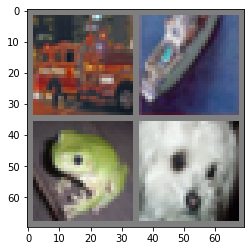

truck  ship  frog   dog


In [100]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    # 输入是什么
    img =img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    # plt imshow的第三个维度是图像通道，img是tensor/numpy，第一个维度是图像通道
    plt.show()
    
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images, nrow=2))
# 将若干个图像拼接为1个图像

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [108]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # input 3 x 32 x 32
        x = self.pool(F.relu(self.conv1(x))) # (32-5)/1 + 1 --> 6 x 28 x 28 --> 6 x 14 x 14
        x = self.pool(F.relu(self.conv2(x))) # (14-5)/1 + 1  -->16 x 10 x 10 --> 16 x 5 x 5 
        x = x.view(-1, 16 * 5 * 5) # --> 400
        x = F.relu(self.fc1(x)) # --> 120
        x = F.relu(self.fc2(x)) # --> 84
        x = self.fc3(x) # --> 10
        x = F.softmax(x, dim=1)
        return x
    
    # relu, pool这些没有重复参数的都可以重用

net = Net()

In [109]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# sgd参数 lr一般为0.001，mementum一般为0.9


In [110]:
for epoch in range(5): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        # 或者 net.zero_grad()，一般使用optimizer.zero_grad
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.6f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    print('Finished Training')

[1,  2000] loss: 2.302620
[1,  4000] loss: 2.302470
[1,  6000] loss: 2.302305
[1,  8000] loss: 2.301924
[1, 10000] loss: 2.301143
[1, 12000] loss: 2.297501
Finished Training
[2,  2000] loss: 2.227906
[2,  4000] loss: 2.183197
[2,  6000] loss: 2.164254
[2,  8000] loss: 2.158895
[2, 10000] loss: 2.147373
[2, 12000] loss: 2.121784
Finished Training
[3,  2000] loss: 2.115984
[3,  4000] loss: 2.106554
[3,  6000] loss: 2.085442
[3,  8000] loss: 2.088938
[3, 10000] loss: 2.080058
[3, 12000] loss: 2.068248
Finished Training
[4,  2000] loss: 2.050469
[4,  4000] loss: 2.055539
[4,  6000] loss: 2.057812
[4,  8000] loss: 2.042878
[4, 10000] loss: 2.040424
[4, 12000] loss: 2.043264
Finished Training
[5,  2000] loss: 2.027760
[5,  4000] loss: 2.014304
[5,  6000] loss: 2.020064
[5,  8000] loss: 2.013200
[5, 10000] loss: 2.006042
[5, 12000] loss: 2.004417
Finished Training
[6,  2000] loss: 1.993767
[6,  4000] loss: 1.988123
[6,  6000] loss: 1.977470
[6,  8000] loss: 1.980500
[6, 10000] loss: 1.983575


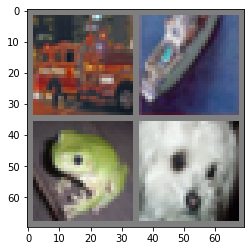

 deer   car   car plane
tensor([0.8411, 0.9916, 0.5082, 1.0000], grad_fn=<MaxBackward0>)
truckpredicted   catpredicted  deerpredicted   dog


In [111]:
imshow(torchvision.utils.make_grid(images, nrow=2))
# 将若干个图像拼接为1个图像
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, dim=1)
print(_)

print('predicted '.join('%5s' % classes[predicted[j]] for j in range(4)))


In [112]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


In [113]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
for i in range(10):
    print('Accuracy of %5s : %2d %%' % ( classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 67 %
Accuracy of  bird : 34 %
Accuracy of   cat : 28 %
Accuracy of  deer : 38 %
Accuracy of   dog : 40 %
Accuracy of  frog : 74 %
Accuracy of horse : 63 %
Accuracy of  ship : 57 %
Accuracy of truck : 69 %


In [114]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cpu


In [115]:
net.to(device)

inputs, labels = inputs.to(device), labels.to(device)

#### 数据并行处理，多个GPU

In [118]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [119]:
input_size = 5
output_size = 2
batch_size = 30
data_size = 100

In [120]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [121]:
class RandomDataset(Dataset):
    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)
        
    def __getitem__(self, index):
        return self.data[index]
    
    def __len__(self):
        return self.len
    
rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size),batch_size=batch_size, shuffle=True)


In [122]:
class Model(nn.Module):
 # Our model
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)
    
    def forward(self, input):
        output = self.fc(input)
        print("\tIn Model: input size", input.size(), "output size", output.size())
        return output

In [123]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
    # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)
model.to(device)
# 并行处理的关键是，nn.DataParallel

Model(
  (fc): Linear(in_features=5, out_features=2, bias=True)
)

In [125]:
for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(), "output_size", output.size())

	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])
